### Short Selling / Short Positions (part 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
close = pd.read_csv("close.csv", index_col= "Date", parse_dates= ["Date"])
close

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,
2014-01-01,433.500000,1076.650024,202.000000,207.262558
2014-01-02,435.068756,1083.500000,199.850006,207.356308
2014-01-03,445.643738,1111.099976,199.149994,208.725052
2014-01-06,439.737488,1119.800049,198.949997,209.250046
2014-01-07,432.143738,1103.074951,194.500000,206.325058
...,...,...,...,...
2024-01-31,1660.900024,3815.949951,273.850006,478.149994
2024-02-01,1657.050049,3854.149902,268.500000,471.350006
2024-02-02,1693.349976,3966.300049,272.549988,483.149994


In [3]:
close["VEDL.NS"] = 1/close["VEDL.NS"]

In [4]:
close

,INFY.NS,TCS.NS,VEDL.NS,WIPRO.NS,RVEDL.NS
Date,,,,,
2014-01-01,433.500000,1076.650024,202.000000,207.262558,0.004950
2014-01-02,435.068756,1083.500000,199.850006,207.356308,0.005004
2014-01-03,445.643738,1111.099976,199.149994,208.725052,0.005021
2014-01-06,439.737488,1119.800049,198.949997,209.250046,0.005026
2014-01-07,432.143738,1103.074951,194.500000,206.325058,0.005141
...,...,...,...,...,...
2024-01-31,1660.900024,3815.949951,273.850006,478.149994,0.003652
2024-02-01,1657.050049,3854.149902,268.500000,471.350006,0.003724
2024-02-02,1693.349976,3966.300049,272.549988,483.149994,0.003669


In [5]:
fx = close[["VEDL.NS", "RVEDL.NS"]].dropna().copy()
fx

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,202.000000,0.004950
2014-01-02,199.850006,0.005004
2014-01-03,199.149994,0.005021
2014-01-06,198.949997,0.005026
2014-01-07,194.500000,0.005141
...,...,...
2024-01-31,273.850006,0.003652
2024-02-01,268.500000,0.003724
2024-02-02,272.549988,0.003669


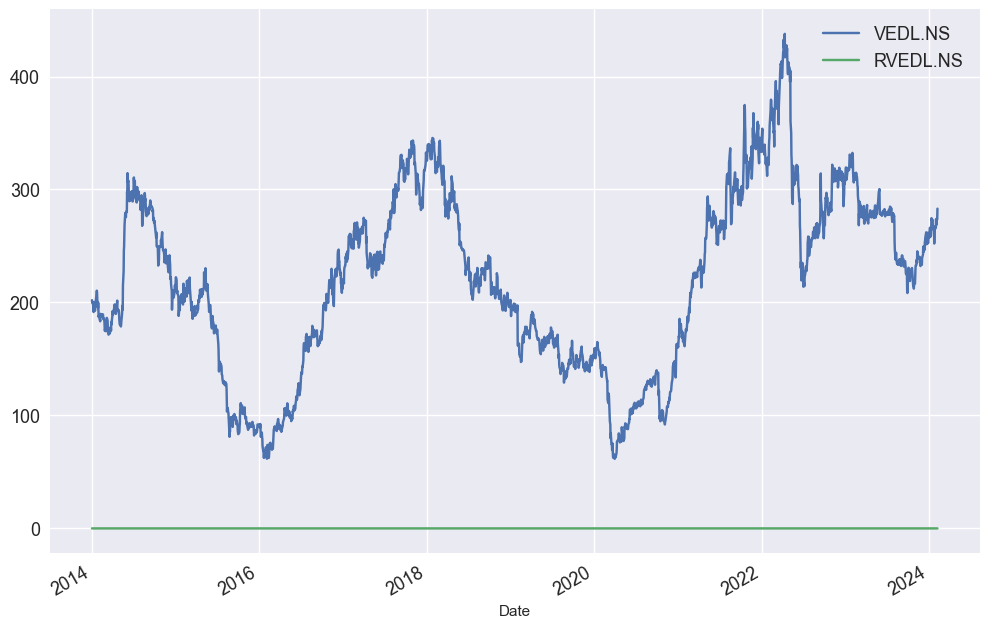

In [6]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [8]:
simple_ret = fx.pct_change() #simple returns
simple_ret

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,NaN,NaN
2014-01-02,-0.010644,0.010758
2014-01-03,-0.003503,0.003515
2014-01-06,-0.001004,0.001005
2014-01-07,-0.022367,0.022879
...,...,...
2024-01-31,0.028545,-0.027752
2024-02-01,-0.019536,0.019926
2024-02-02,0.015084,-0.014860


In [10]:
simple_ret.add(1).prod() -1 #compound simple returns

VEDL.NS     0.400990
RVEDL.NS   -0.286219
dtype: float64

---> For simple returns: long position returns != short positive returns*(-1)

In [11]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,NaN,NaN
2014-01-02,-0.010701,0.010701
2014-01-03,-0.003509,0.003509
2014-01-06,-0.001005,0.001005
2014-01-07,-0.022621,0.022621
...,...,...
2024-01-31,0.028145,-0.028145
2024-02-01,-0.019730,0.019730
2024-02-02,0.014971,-0.014971


In [13]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,NaN,NaN
2014-01-02,-0.010701,0.010701
2014-01-03,-0.003509,0.003509
2014-01-06,-0.001005,0.001005
2014-01-07,-0.022621,0.022621
...,...,...
2024-01-31,0.028145,-0.028145
2024-02-01,-0.019730,0.019730
2024-02-02,0.014971,-0.014971


In [14]:
log_ret.sum() #cumulative log returns

VEDL.NS     0.337179
RVEDL.NS   -0.337179
dtype: float64

In [15]:
# ----->> For log returns: log position returns == short position returns*(-1)

In [16]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalized prices (Base 1)
norm_fx

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,NaN,NaN
2014-01-02,0.989356,1.010758
2014-01-03,0.985891,1.014311
2014-01-06,0.984901,1.015331
2014-01-07,0.962871,1.038560
...,...,...
2024-01-31,1.355693,0.737630
2024-02-01,1.329208,0.752328
2024-02-02,1.349257,0.741148


In [17]:
norm_fx.iloc[0] = [1,1]

In [18]:
norm_fx

,VEDL.NS,RVEDL.NS
Date,,
2014-01-01,1.000000,1.000000
2014-01-02,0.989356,1.010758
2014-01-03,0.985891,1.014311
2014-01-06,0.984901,1.015331
2014-01-07,0.962871,1.038560
...,...,...
2024-01-31,1.355693,0.737630
2024-02-01,1.329208,0.752328
2024-02-02,1.349257,0.741148


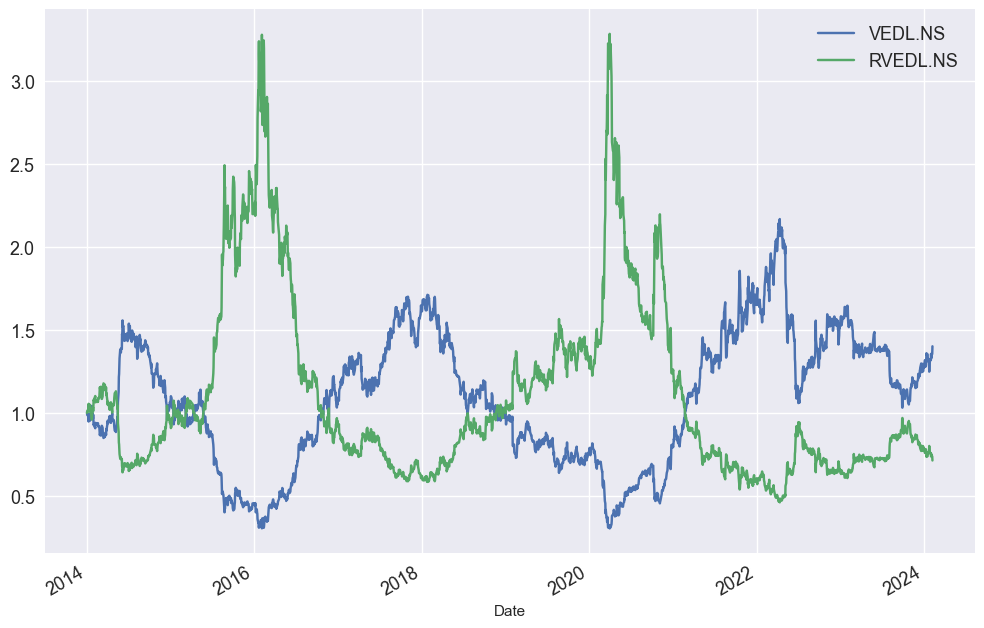

In [20]:
norm_fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()